In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

from fintools import *


C:\Users\dimitri\workspaces\opensource\finance-toolbox


# CPPI

## The Limits of Diversification

In [2]:
pwd

'C:\\Users\\dimitri\\workspaces\\opensource\\finance-toolbox'

In [3]:
returns = load_industry_data('ind30_m_ew_rets.csv')/100
firms = load_industry_data('ind30_m_nfirms.csv')
sizes = load_industry_data('ind30_m_size.csv')

In [4]:
#Market Capitalization

market_cap = firms * sizes
market_cap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


<AxesSubplot:>

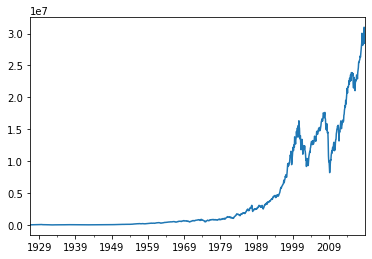

In [5]:
total_market_cap= market_cap.sum(axis=1)
total_market_cap.plot()

In [6]:
#weight industries by Market cap every year
capitalization_weight = market_cap.divide(total_market_cap, axis='rows')
capitalization_weight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


<AxesSubplot:>

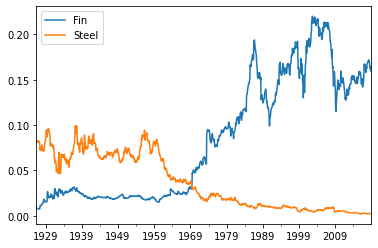

In [7]:
## See how industry importance changes over time
capitalization_weight[['Fin','Steel']].plot()

<AxesSubplot:>

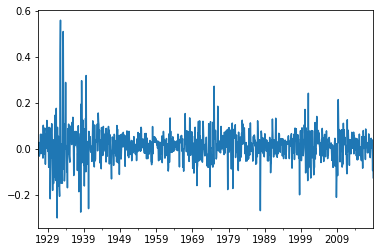

In [8]:
# Plot the returns of the Cap-weighted Portfolio
total_market_return = (capitalization_weight*returns).sum(axis='columns')
total_market_return.plot()

<AxesSubplot:>

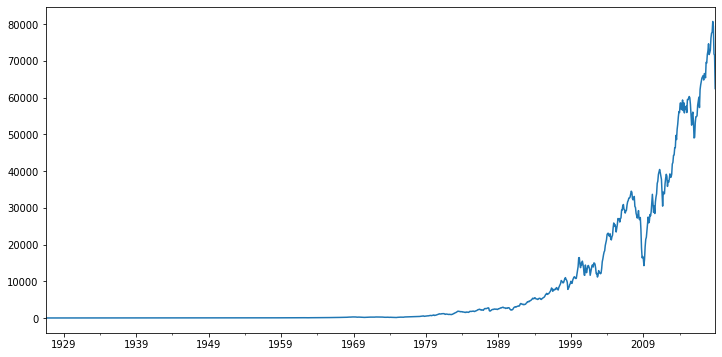

In [9]:
# Compute the Drawdowns of the Cap-Weighted portfolio and show the variation in wealt
drawdowns = compute_drawdown(total_market_return, initial_wealth=1)
total_market_index = drawdowns.wealth
total_market_index.plot(figsize=(12, 6))

<AxesSubplot:>

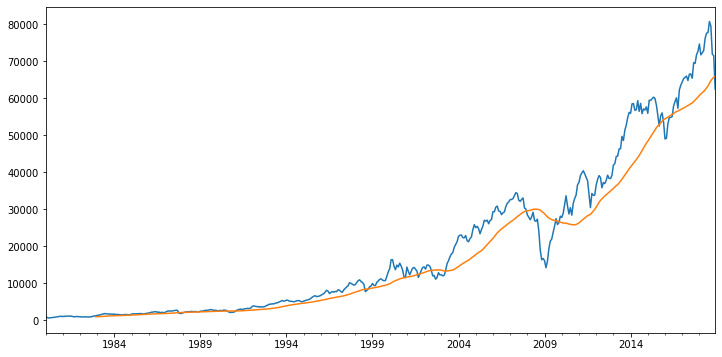

In [10]:
# Zoom into the 80s +
total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window=36).mean().plot()

<AxesSubplot:>

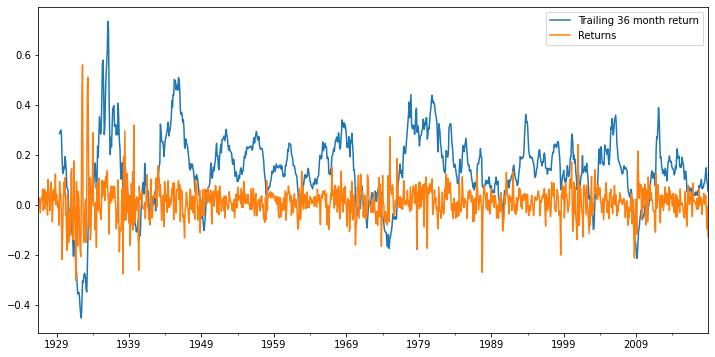

In [11]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(annualize_returns, 12)
tmi_tr36rets.plot(figsize=(12,6), label="Trailing 36 month return", legend=True)
total_market_return.plot(label="Returns", legend=True)

## Rolling Correlation

Text(0.5, 1.0, 'Rolling Mean Correlation')

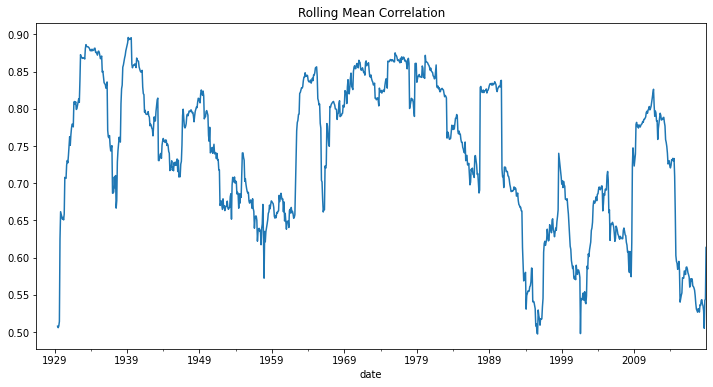

In [12]:
import matplotlib.pyplot as plt

ts_corr = returns.rolling(window=36).corr()
ts_corr.index.names = ['date','industry']
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot(figsize=(12,6))
plt.title('Rolling Mean Correlation')

<AxesSubplot:label='c950f3f2-a5e1-4906-a17d-87cb67b419d7'>

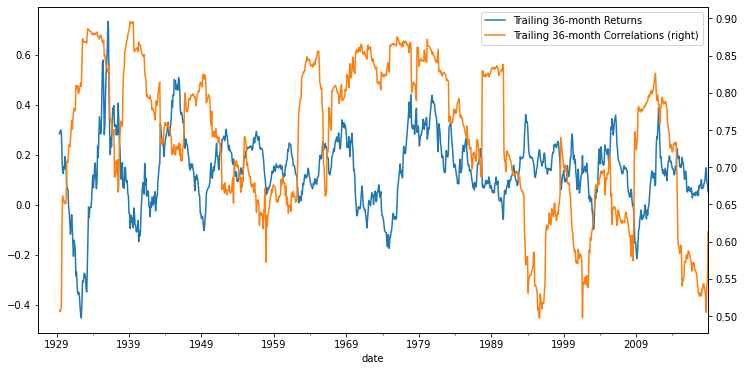

In [13]:
tmi_tr36rets.plot(label='Trailing 36-month Returns', figsize=(12,6), legend=True)
ind_tr36corr.plot(label='Trailing 36-month Correlations', figsize=(12,6), legend=True,
                 secondary_y=True)

### Moral of the Story: when market is down, correlations are increasing and vice versa

In [14]:
#returns are negatively correlated to correlations
tmi_tr36rets.corr(ind_tr36corr)

-0.15481428819018558